<a href="https://colab.research.google.com/github/utkarsh-crypto/Gender_classification_VGG-16/blob/main/Vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

drive_path = "/content/drive/MyDrive/cnn/UTKFace.zip"
local_path = '/content'
!cp '{drive_path}' .
os.chdir(local_path)
!unzip -q 'UTKFace.zip'

In [ ]:
#Give dataset path
train_path = '/content/UTKFace/train'
test_path = '/content/UTKFace/test'

Working with 9205 images
Image examples: 
45_0_3_20170119204728031.jpg.chip.jpg


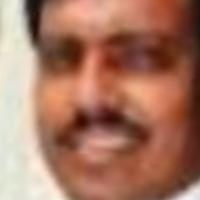

38_0_1_20170113154658138.jpg.chip.jpg


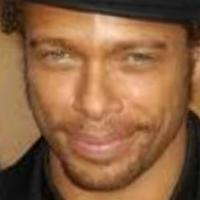

38_0_0_20170103183142330.jpg.chip.jpg


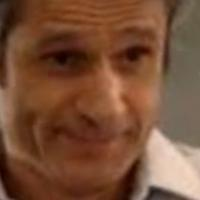

57_0_0_20170120222949154.jpg.chip.jpg


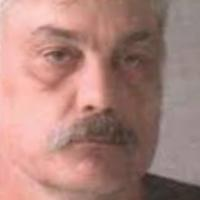

26_0_0_20170117091213670.jpg.chip.jpg


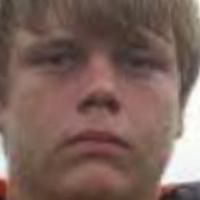

44_0_3_20170119172207729.jpg.chip.jpg


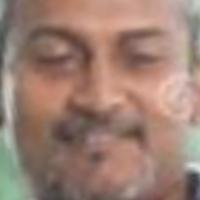

52_0_3_20170119205638160.jpg.chip.jpg


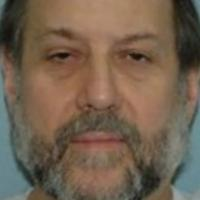

56_0_4_20170105173517933.jpg.chip.jpg


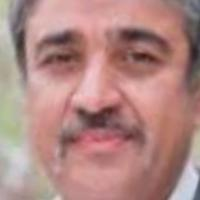

10_0_1_20170110223848885.jpg.chip.jpg


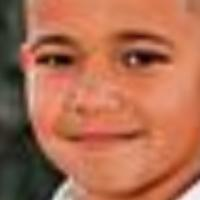

25_0_0_20170117151831828.jpg.chip.jpg


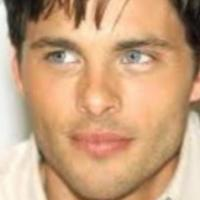

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/male'


onlymalefiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlymalefiles)))
print("Image examples: ")


for i in range(10):
    print(onlymalefiles[i])
    display(_Imgdis(filename=folder + "/" + onlymalefiles[i], width=224, height=224))

In [ ]:
num_classes=2


In [ ]:
# #model initialization
# vgg=VGG16(include_top=False, pooling='max', weights='imagenet',input_shape=(224, 224, 3))

# # Freeze the layers except the last 5
# for layer in vgg.layers:
#  layer.trainable = False
# # Check the trainable status of the individual layers
# for layer in vgg.layers:
#  print(layer, layer.trainable)

# vgg.summary()




In [ ]:
# Generate a model with all layers (with top)
from keras import models
from keras import layers
vgg16 = VGG16(weights="imagenet", include_top=True)

for layer in vgg16.layers:
 layer.trainable = False

#Add a layer where input is the output of the  second last layer 
x = Dense(2, activation='softmax', name='predictions')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(inputs=vgg16.input, outputs=x)
my_model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# from keras import models
# from keras import layers

# model = models.Sequential()

# # Add new layers for fine-tuning
# model.add(vgg)
# model.add(Flatten())
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(num_classes, activation='softmax'))

# model.summary()

In [ ]:
#Model Optimizer&Loss set
from keras import optimizers

my_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
# use early stopping to optimally terminate training through callbacks
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=3)

# save best model automatically
import h5py
mc= ModelCheckpoint('/content/optimal.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
cb_list=[es,mc]

In [ ]:
#Pre-Processing
data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/content/UTKFace/train',
        target_size=(224, 224),
        batch_size=12,
        class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
        '/content/UTKFace/val',
        target_size=(224, 224),
        batch_size=12,
        class_mode='categorical')





Found 17287 images belonging to 2 classes.
Found 4616 images belonging to 2 classes.


In [ ]:

history=my_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=cb_list)

Epoch 1/10
1441/1441 [==============================] - ETA: 0s - loss: 0.3740 - accuracy: 0.8405
Epoch 00001: val_accuracy improved from -inf to 0.82517, saving model to /content/optimal.h5
1441/1441 [==============================] - 257s 170ms/step - loss: 0.3740 - accuracy: 0.8405 - val_loss: 0.3885 - val_accuracy: 0.8252
Epoch 2/10
1441/1441 [==============================] - ETA: 0s - loss: 0.3233 - accuracy: 0.8673
Epoch 00002: val_accuracy did not improve from 0.82517
1441/1441 [==============================] - 238s 165ms/step - loss: 0.3233 - accuracy: 0.8673 - val_loss: 0.4501 - val_accuracy: 0.8109
Epoch 3/10
1441/1441 [==============================] - ETA: 0s - loss: 0.2968 - accuracy: 0.8774
Epoch 00003: val_accuracy improved from 0.82517 to 0.83016, saving model to /content/optimal.h5
1441/1441 [==============================] - 239s 166ms/step - loss: 0.2968 - accuracy: 0.8774 - val_loss: 0.3947 - val_accuracy: 0.8302
Epoch 4/10
1441/1441 [=============================

In [ ]:
#load best model
from keras.models import load_model
saved_model = load_model('/content/optimal.h5')

In [ ]:
#testing on tuned model
test_generator = data_generator.flow_from_directory(
        '/content/UTKFace/test',
        target_size=(224, 224),
        class_mode='categorical')

# # obtain predicted activation values for the last dense layer
# pred = saved_model.predict(test_generator, verbose=1)
# # determine the maximum activation value for each sample
# predicted_class_indices=np.argmax(pred,axis=1)



Found 1804 images belonging to 2 classes.


In [ ]:
results = saved_model.evaluate(test_generator)
results

57/57 [==============================] - 14s 236ms/step - loss: 0.4819 - accuracy: 0.8038


[0.48193982243537903, 0.8037694096565247]

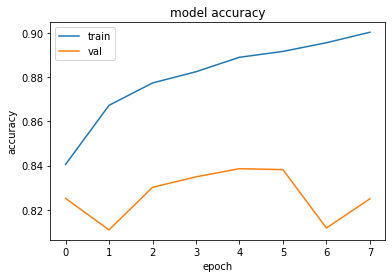

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

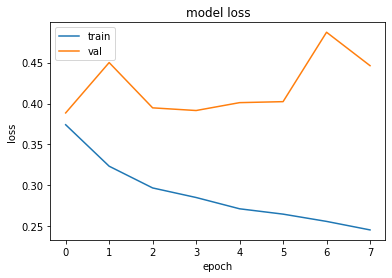

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()